<a href="https://colab.research.google.com/github/HaywhyCoder/Telco_Customer_Churn/blob/main/notebooks/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import StratifiedKFold, HalvingRandomSearchCV
import shap

# Handle warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)

### Import Data

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/FlexiSAF Internship/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data = dataset.copy()
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
# Getting the number of rows and columns in the dataset
data.shape

(7043, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


From looking through the dataset, I can see that some features like the `SeniorCitizen` and `TotalCharges` are in the wrong data types. I'll be converting those first

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Selecting data types
categorical_features = [col for col in data.select_dtypes(include='object').columns if col not in ["customerID", "Churn"]]
numerical_features = data.select_dtypes(exclude='object').columns.to_list()
taget = ["Churn"]

In [ ]:
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
# Checking for duplicates
data.duplicated().sum()

np.int64(0)

In [ ]:
id = data[data['TotalCharges'].isnull()].index
data[data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Seeing as all these people have a tenure of 0, meaning that they haven't been with the company for up to a month, the monthly plan can be taken as the billing price for their subscription and that they haven't been billed yet. This also reinforces why they all were recorded as no churn, since they're new cutomers.
I'll take their total charge as $0

In [ ]:
data['TotalCharges'].fillna(0, inplace=True)

In [ ]:
# Checking the rows with null values
data.iloc[id]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
for col in categorical_features:
  print(f"{col}: {data[col].unique()}\n")

gender: ['Female' 'Male']

SeniorCitizen: [0 1]

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']



In [ ]:
for col in categorical_features:
  print(f"{data[col].value_counts()}\n")

gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport
No                     3473
Yes                    2044
No internet service    15

In [ ]:
data["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


###EDA

#### Univariate Analysis

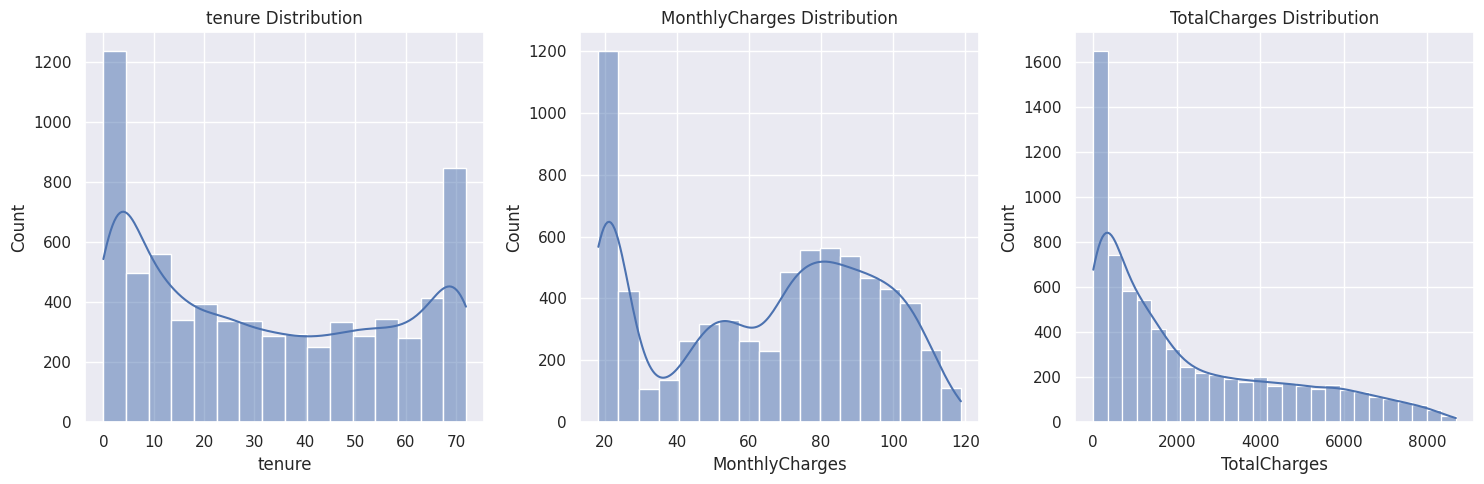

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(numerical_features):
  sns.histplot(data=data, x=col, kde=True, ax=axes[i])
  axes[i].set_title(f"{col} Distribution")

plt.tight_layout()
plt.show()

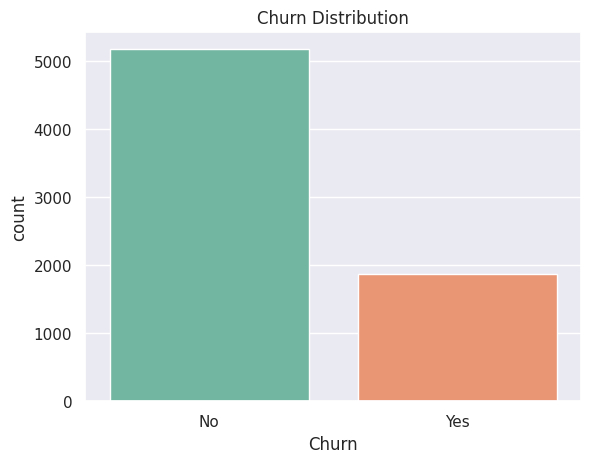

In [ ]:
sns.countplot(data=data, x="Churn",palette="Set2")
plt.title("Churn Distribution")
plt.show()

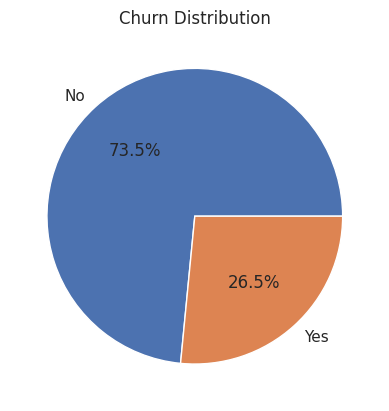

In [ ]:
percentage = data["Churn"].value_counts(normalize=True) * 100
plt.pie(percentage, labels=percentage.index, autopct="%1.1f%%")
plt.title("Churn Distribution")
plt.show()

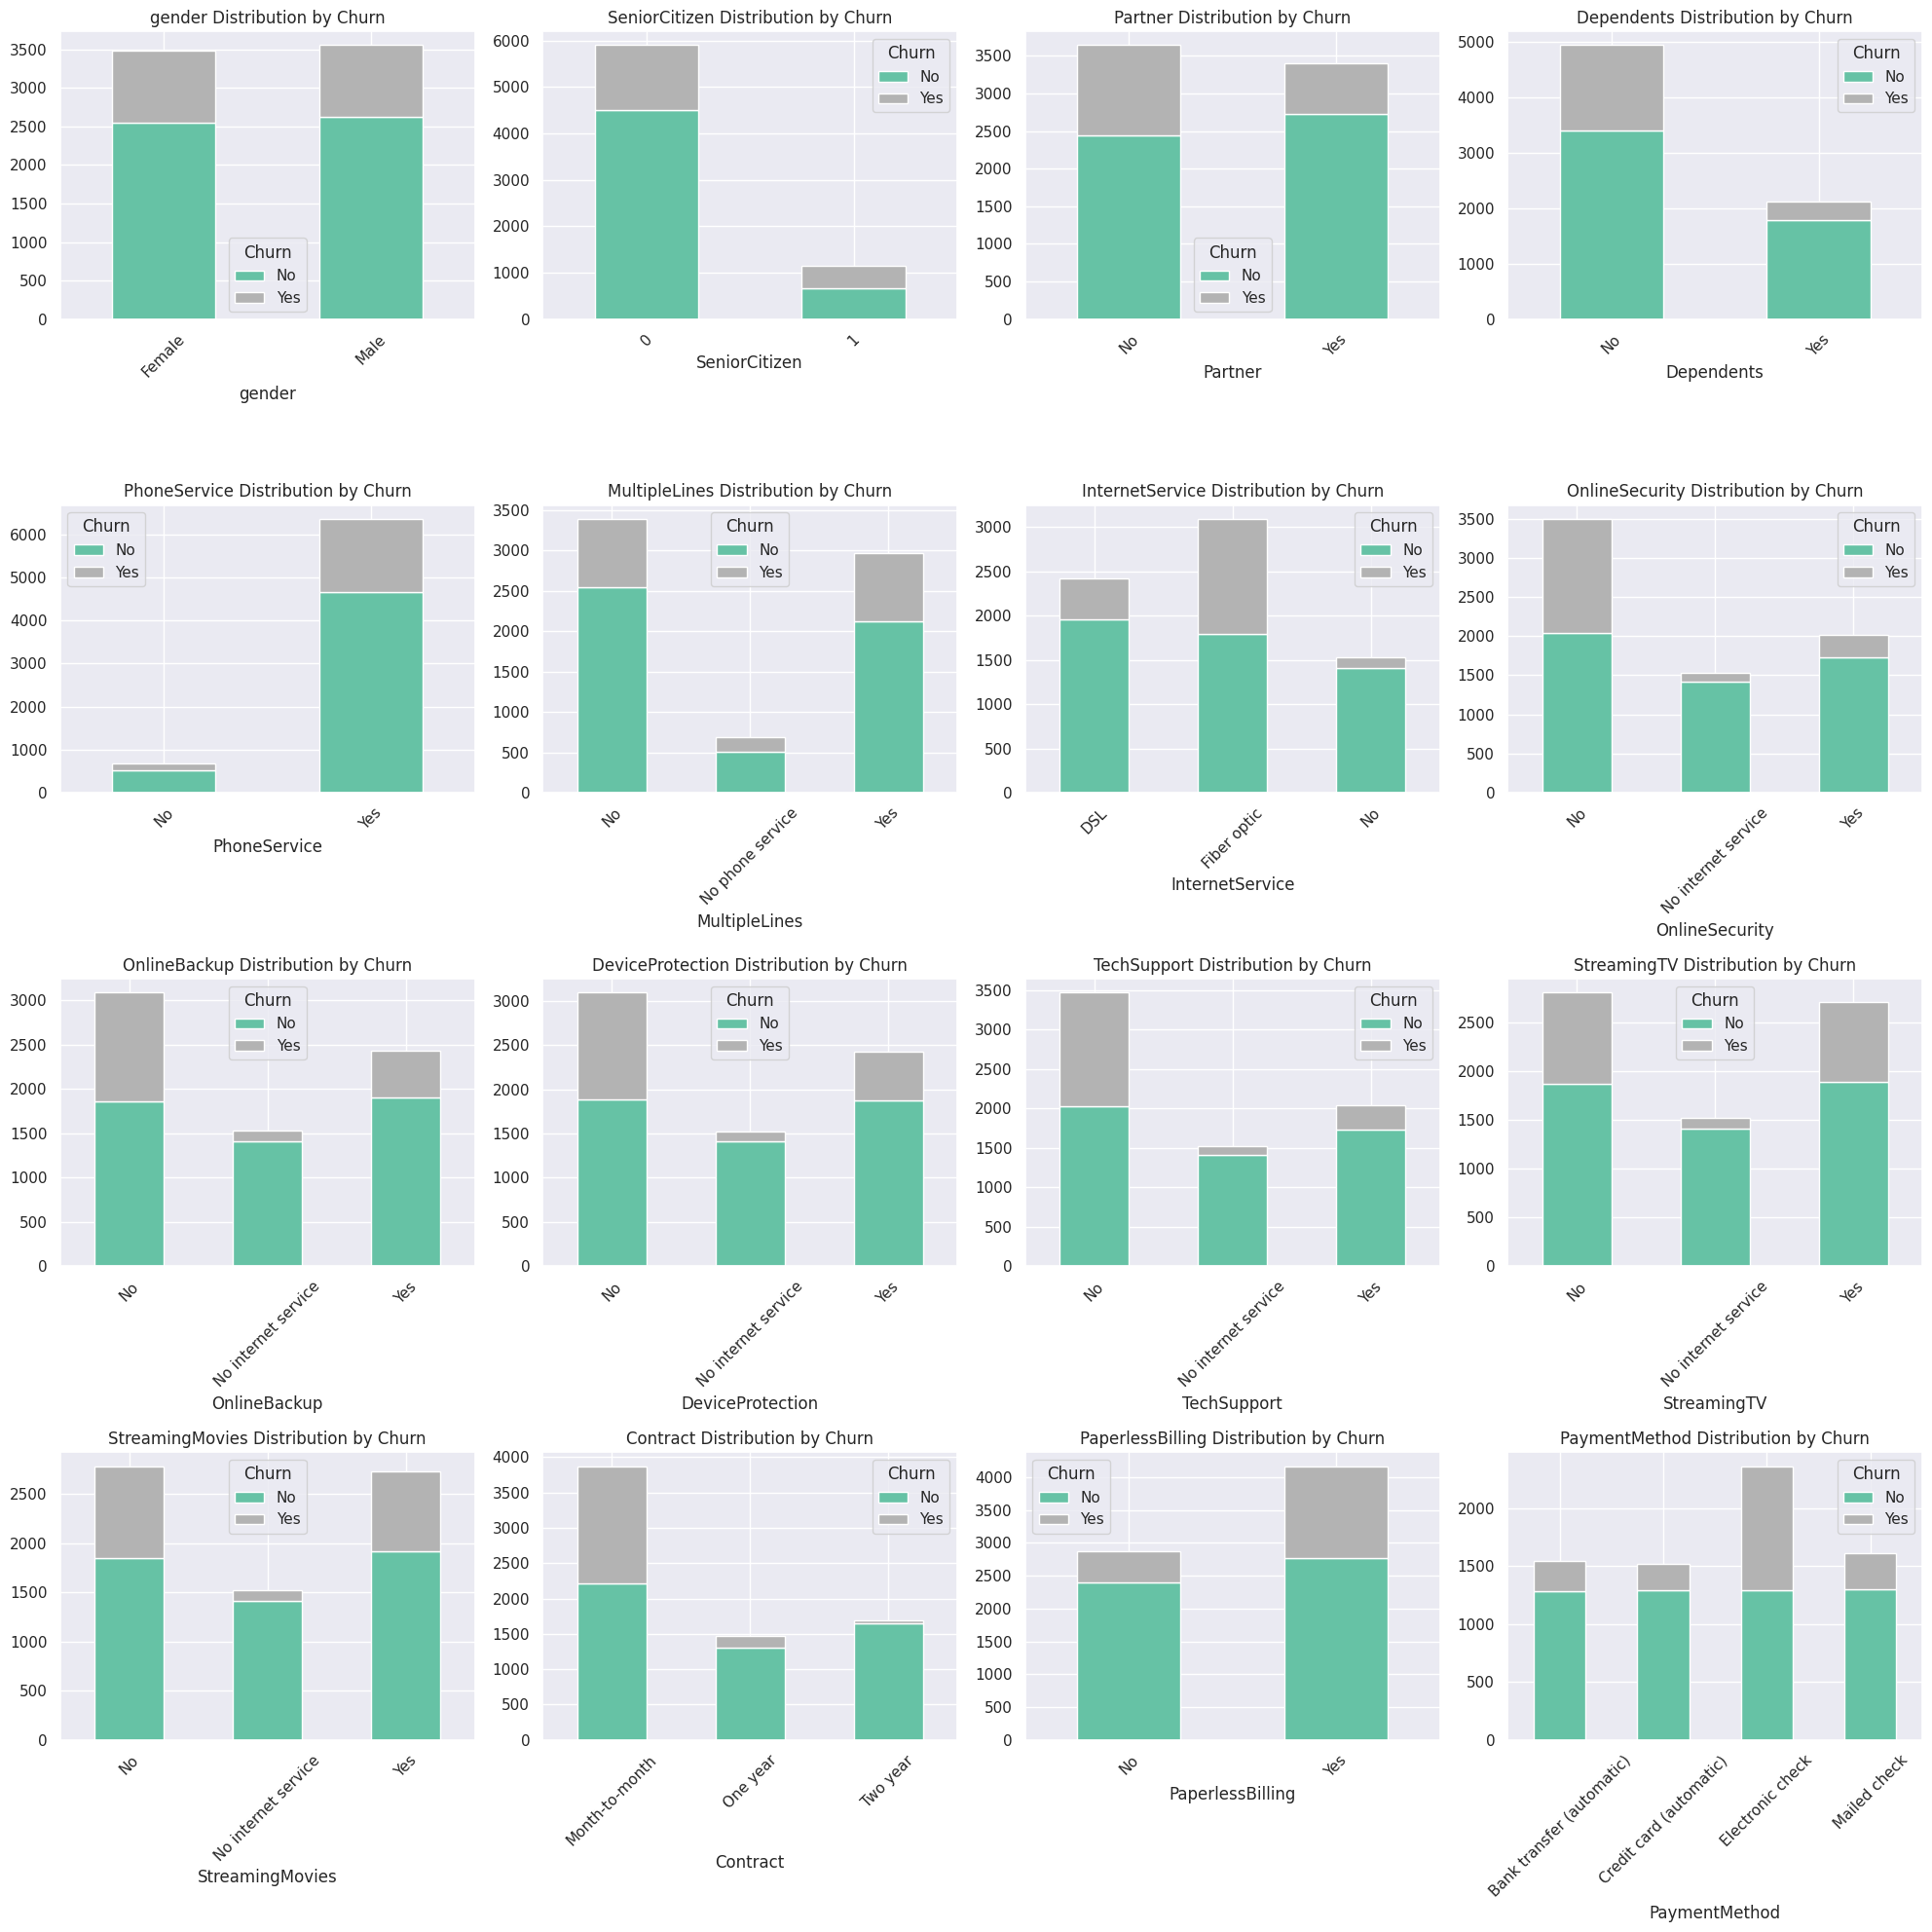

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    data.groupby(col)['Churn'].value_counts().unstack().plot(kind='bar', stacked=True, ax=axes[i], colormap='Set2')
    axes[i].set_title(f"{col} Distribution by Churn")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title="Churn")

plt.tight_layout()
plt.show()

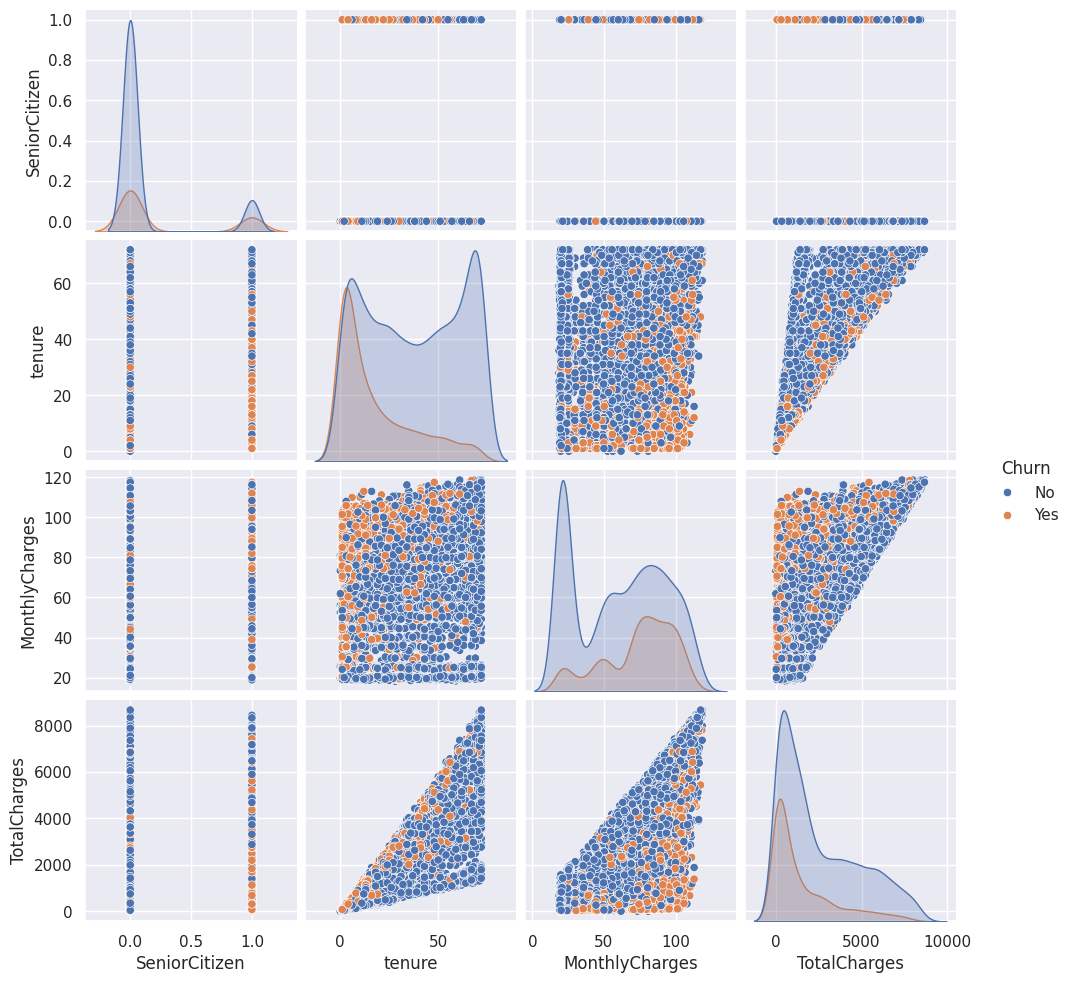

In [ ]:
sns.pairplot(data=data, hue="Churn")
plt.show()

In [ ]:
# Splitting the data into features and target variable
X = data.drop(columns=["customerID", "Churn"])
y = data["Churn"].map({"Yes": 1, "No": 0})

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train.shape

(5634, 19)

### Data Processing Pipeline

In [ ]:
service_cols = [
        'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'
        ]

In [ ]:
class AddFeatures(BaseEstimator, TransformerMixin):
  def init(self):
    pass

  def fit(self, X, y=None):
    self.feature_names = X.columns.to_list()
    return self

  def transform(self, X, y=None):
    X["tenure_category"] = pd.cut(X["tenure"], bins=[0, 6, 12, 24, np.inf], labels=["0-6", "7-12", "13-24", "25+"], include_lowest=True)
    X["ServiceCount"] = X[service_cols].apply(lambda row: sum((row != "No") & (row != "No internet service") & (row != "No phone service")), axis=1)
    X["MonthlyCharges"] = X.apply(lambda x: x["TotalCharges"] / x["tenure"] if x["tenure"] > 0 else 0, axis=1)
    X["BundleUser"] = np.where((X["PhoneService"] == "Yes") & (X["InternetService"] != "No"), 1, 0)
    X["BillingRate"] = pd.qcut(X["MonthlyCharges"], q=3, labels=["Low", "Medium", "High"])
    return X

  def get_feature_names_out(self, input_features=None):
    return self.feature_names

In [ ]:
cat_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_category',
       'BillingRate']

In [ ]:
# Numeric Pipeline
numeric_pipeline = ColumnTransformer(
    [
        ('scale', StandardScaler().set_output(transform="pandas"), ['tenure', 'MonthlyCharges', 'TotalCharges', 'ServiceCount'])
    ],
    verbose_feature_names_out=False,
    remainder="passthrough"
).set_output(transform="pandas")


custom_categories = [
    ['Female', 'Male'],
    ['No', 'Yes'],
    ['No', 'Yes'],
    ['No', 'Yes'],
    ['No', 'Yes','No phone service'],
    ['No', 'DSL', 'Fiber optic'],
    ['No',  'Yes', 'No internet service'],
    ['No',  'Yes', 'No internet service'],
    ['No',  'Yes', 'No internet service'],
    ['No',  'Yes', 'No internet service'],
    ['No',  'Yes', 'No internet service'],
    ['No',  'Yes', 'No internet service'],
    ['Month-to-month', 'One year', 'Two year'],
    ['No', 'Yes'],
    ['0-6', '7-12', '13-24', '25+'],
    ['Low', 'Medium', 'High']
    ]

# Categorical Pipeline
categorical_pipeline = ColumnTransformer(
    [
        ("onehot", OneHotEncoder(handle_unknown="ignore"), ['PaymentMethod']),
        ("ordinal", OrdinalEncoder(categories=custom_categories), [col for col in cat_col if col not in ['SeniorCitizen', 'PaymentMethod']])
    ],
    verbose_feature_names_out=False,
    remainder="passthrough"
    )

# Instantiate AddFeatures
add_features_transformer = AddFeatures()

preprocessing = Pipeline([
    ("engineering", add_features_transformer),
    ("numeric", numeric_pipeline),
    ("categorical", categorical_pipeline)
])

Logistic Regression model:
Train Accuracy: 0.8097 | ROC-AUC: 0.851
Test Accuracy: 0.8020 | ROC-AUC: 0.843
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      4139
           1       0.68      0.54      0.60      1495

    accuracy                           0.81      5634
   macro avg       0.76      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



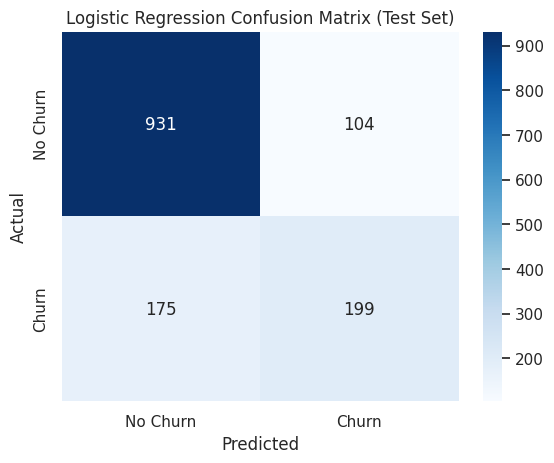

Random Forest model:
Train Accuracy: 0.9980 | ROC-AUC: 1.000
Test Accuracy: 0.7850 | ROC-AUC: 0.818
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       0.99      1.00      1.00      1495

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



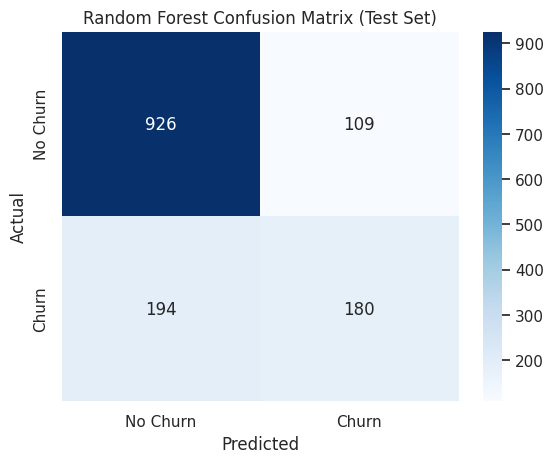

XGBoost model:
Train Accuracy: 0.9498 | ROC-AUC: 0.988
Test Accuracy: 0.7793 | ROC-AUC: 0.822
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      4139
           1       0.92      0.89      0.90      1495

    accuracy                           0.95      5634
   macro avg       0.94      0.93      0.93      5634
weighted avg       0.95      0.95      0.95      5634

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.60      0.52      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.70      1409
weighted avg       0.77      0.78      0.77      1409



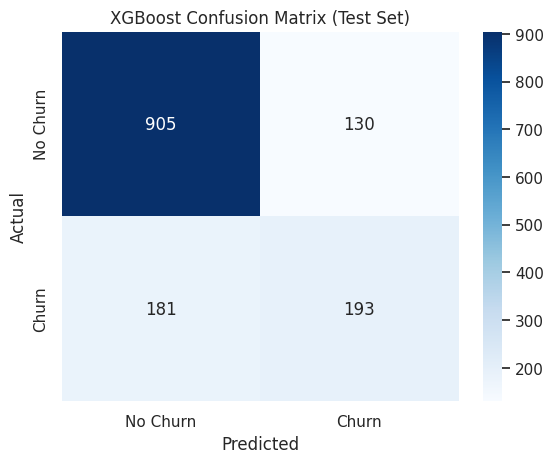

[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 650
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM model:
Train Accuracy: 0.8626 | ROC-AUC: 0.949
Test Accuracy: 0.7551 | ROC-AUC: 0.838
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      4139
           1       0.67      0.95      0.79      1495

    accuracy                           0.86      5634
   macro avg       0.82      0.89      0.84      5634
weighted avg       0.90      0.86      0.87      

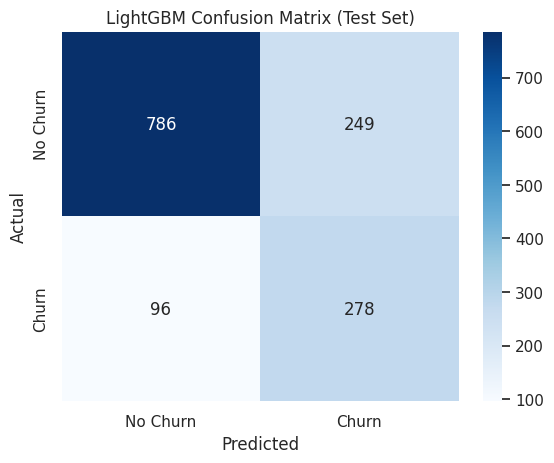

In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(random_state = 42),
    "Random Forest": RandomForestClassifier(random_state = 42, class_weight='balanced'),
    "XGBoost": XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, class_weight='balanced', objective='binary'),
    }

for name, model in classifiers.items():
  clf = Pipeline([
      ("preprocessing", preprocessing),
      (name, model)
  ])
  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)

  y_train_proba = clf.predict_proba(X_train)[:, 1]
  y_test_proba = clf.predict_proba(X_test)[:, 1]

  # Metrics
  train_accuracy = clf.score(X_train, y_train)
  test_accuracy = clf.score(X_test, y_test)
  train_auc = roc_auc_score(y_train, y_train_proba)
  test_auc = roc_auc_score(y_test, y_test_proba)

  # Report
  print(f"{name} model:")
  print(f"Train Accuracy: {train_accuracy:.4f} | ROC-AUC: {train_auc:.3f}")
  print(f"Test Accuracy: {test_accuracy:.4f} | ROC-AUC: {test_auc:.3f}")
  classification_report_train = classification_report(y_train, y_pred_train)
  classification_report_test = classification_report(y_test, y_pred_test)
  print("Classification Report (Train):\n", classification_report_train)
  print("Classification Report (Test):\n", classification_report_test)

  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred_test)
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title(f"{name} Confusion Matrix (Test Set)")
  plt.show()

#### Hyperparameter Tuning

In [ ]:
from scipy.stats import loguniform

weights = np.linspace(0.0, 0.99,200)

param_grids = {
    "Logistic Regression": {'Logistic Regression__class_weight': [{0:1.0-x, 1:x} for x in weights]},
    "Random Forest": {
        'Random Forest__class_weight': [{0:1.0-x, 1:x} for x in weights],
        'Random Forest__n_estimators': np.arange(100, 1000, 100),
        'Random Forest__max_depth': [None, 10, 20, 30],
        'Random Forest__min_samples_split': [2, 5, 10],
        },
    "XGBoost": {
        'XGBoost__objective': ['binary:logistic', 'binary:logitraw'],
        'XGBoost__max_depth': [3, 4, 5, 6, 7],
        'XGBoost__n_estimators': np.arange(100, 1000, 100),
        'XGBoost__learning_rate': loguniform(0.01, 1),
        'XGBoost__scale_pos_weight': np.linspace(0.0, 0.9)
        },
    "LightGBM": {
        'LightGBM__objective': ['binary'],
        'LightGBM__class_weight': ['balanced'],
        'LightGBM__n_estimators': np.arange(100, 1000, 100),
        'LightGBM__learning_rate': loguniform(0.01, 1),
        'LightGBM__max_depth': [-1, 3, 4, 5, 6, 7],
        }
}


for model_name, model in classifiers.items():
  clf = Pipeline([
      ("preprocessing", preprocessing),
      (model_name, model)])
  print(f"Training {model_name} model...")
  halved_rand_search = HalvingRandomSearchCV(
      estimator=clf,
      param_distributions=param_grids[model_name],
      cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
      scoring='f1',
      verbose=2,
      n_jobs=-1,
      random_state=42,
  )
  halved_rand_search.fit(X_train, y_train)

  best_model = halved_rand_search.best_estimator_
  best_score = halved_rand_search.best_score_
  best_params = halved_rand_search.best_params_

  # Evaluate best model on test set
  y_pred_test = best_model.predict(X_test)
  y_pred_test_score = f1_score(y_test, y_pred_test, average='weighted')

  # Report
  print(f"Best Parameters for {model_name}: {best_params}")
  print(f"Best F1 Score for {model_name}: {best_score}")
  print(f"Test F1 Score for {model_name}: {y_pred_test_score}")
  print("-"*50)

LR model:
Train Accuracy: 0.7254 | ROC-AUC: 0.851
Test Accuracy: 0.7154 | ROC-AUC: 0.843
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.93      0.68      0.78      4139
           1       0.49      0.85      0.62      1495

    accuracy                           0.73      5634
   macro avg       0.71      0.76      0.70      5634
weighted avg       0.81      0.73      0.74      5634

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.92      0.67      0.78      1035
           1       0.48      0.83      0.61       374

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.80      0.72      0.73      1409



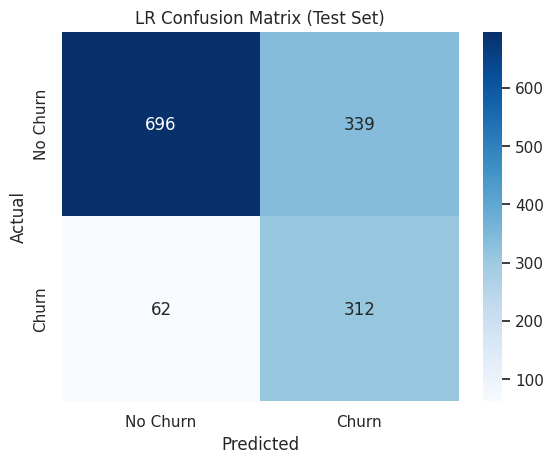

RF model:
Train Accuracy: 0.8781 | ROC-AUC: 0.976
Test Accuracy: 0.7566 | ROC-AUC: 0.833
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.99      0.84      0.91      4139
           1       0.69      0.98      0.81      1495

    accuracy                           0.88      5634
   macro avg       0.84      0.91      0.86      5634
weighted avg       0.91      0.88      0.88      5634

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1035
           1       0.53      0.74      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



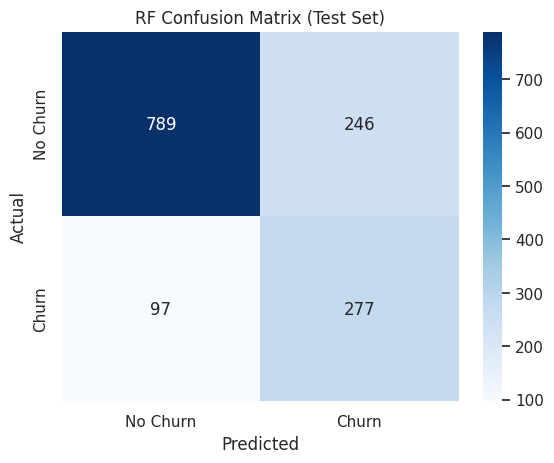

xgb model:
Train Accuracy: 0.8466 | ROC-AUC: 0.913
Test Accuracy: 0.7991 | ROC-AUC: 0.836
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4139
           1       0.78      0.58      0.67      1495

    accuracy                           0.85      5634
   macro avg       0.82      0.76      0.78      5634
weighted avg       0.84      0.85      0.84      5634

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.67      0.48      0.56       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



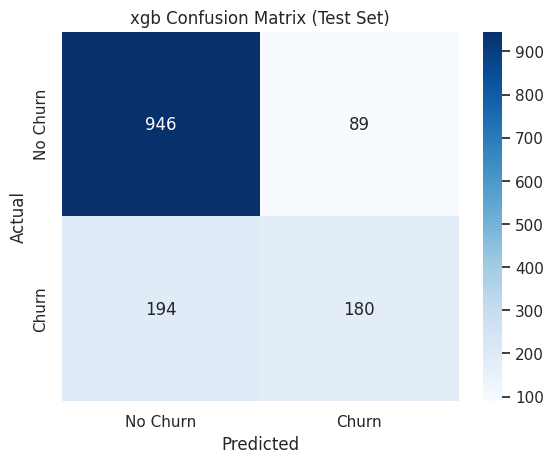

lgbm model:
Train Accuracy: 0.7599 | ROC-AUC: 0.865
Test Accuracy: 0.7495 | ROC-AUC: 0.846
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      4139
           1       0.53      0.82      0.65      1495

    accuracy                           0.76      5634
   macro avg       0.73      0.78      0.73      5634
weighted avg       0.82      0.76      0.77      5634

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.52      0.81      0.63       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



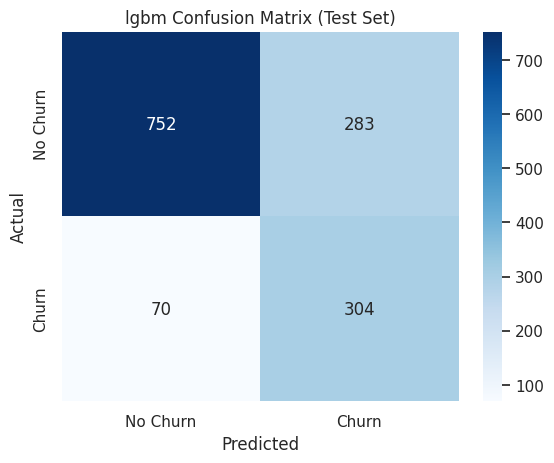

In [ ]:

best_classifiers = {
    "LR": LogisticRegression(class_weight={0: np.float64(0.21396984924623108), 1: np.float64(0.7860301507537689)}, random_state=42),
    "RF": RandomForestClassifier(n_estimators=200, min_samples_split=10, max_depth=None, class_weight={0: np.float64(0.11944723618090447), 1: np.float64(0.8805527638190955)}, random_state=42),
    "xgb": XGBClassifier(n_estimators=400, max_depth=3, objective='binary:logistic', scale_pos_weight=0.8816326530612246, learning_rate=0.10903884523201109, random_state=42),
    "lgbm": LGBMClassifier(objective='binary', class_weight='balanced', n_estimators=200, learning_rate=0.02342658105820405, max_depth=3, verbose=-1, random_state=42)}

for name, model in best_classifiers.items():
  clf = Pipeline([
      ("preprocessing", preprocessing),
      (name, model)
  ])
  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)

  y_train_proba = clf.predict_proba(X_train)[:, 1]
  y_test_proba = clf.predict_proba(X_test)[:, 1]

  # Metrics
  train_accuracy = clf.score(X_train, y_train)
  test_accuracy = clf.score(X_test, y_test)
  train_auc = roc_auc_score(y_train, y_train_proba)
  test_auc = roc_auc_score(y_test, y_test_proba)

  # Report
  print(f"{name} model:")
  print(f"Train Accuracy: {train_accuracy:.4f} | ROC-AUC: {train_auc:.3f}")
  print(f"Test Accuracy: {test_accuracy:.4f} | ROC-AUC: {test_auc:.3f}")
  classification_report_train = classification_report(y_train, y_pred_train)
  classification_report_test = classification_report(y_test, y_pred_test)
  print("Classification Report (Train):\n", classification_report_train)
  print("Classification Report (Test):\n", classification_report_test)

  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred_test)
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title(f"{name} Confusion Matrix (Test Set)")
  plt.show()

Given the business goal of customer retention, I'll be choosing a model with higher recall on the positive class even if this leads to a lower precision. It's better to spend more on customers less likely to churn than to lose customers who actually are likely to churn because the model couldn't identify them.

I'll be using the LightGBM model as it has a higher F1 as well as ROC-AUC score

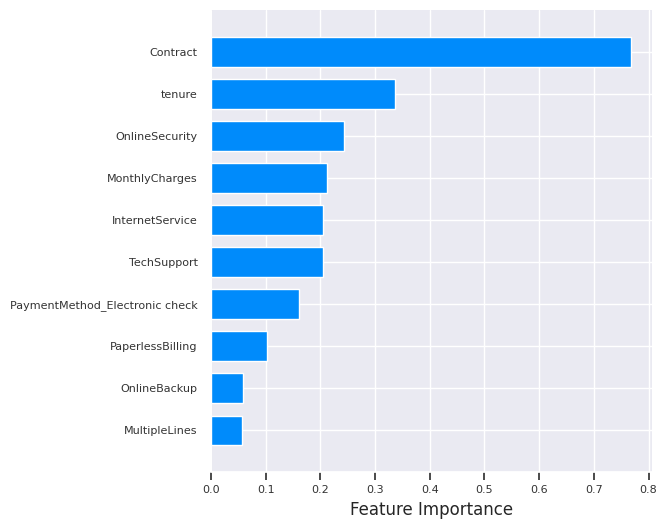

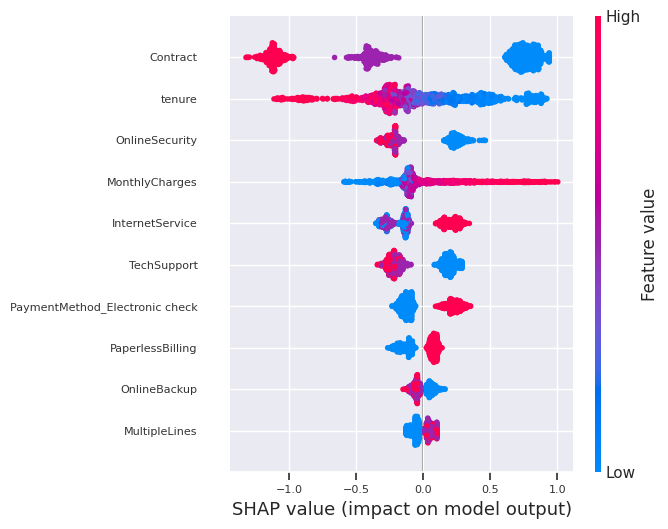

In [ ]:
lgbm_explainer = shap.Explainer(best_classifiers["lgbm"])
shap_values = lgbm_explainer(preprocessing.transform(X_test))
feature_names = clf.get_params()['preprocessing__categorical'].get_feature_names_out().tolist()
# Feature Importance
shap.summary_plot(shap_values, feature_names=feature_names, max_display=10, plot_type='bar', show=False)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("Feature Importance", fontsize=12)
plt.show()
shap.summary_plot(shap_values, feature_names=feature_names, max_display=10, show=False)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# plt.tight_layout()
plt.show()




The SHAP analysis above reveals exactly how the model makes churn predictions by showing which customer characteristics are most influential and how they impact the decision.

**Key Insights from SHAP Analysis**

* **📋 Contract Type** is the most important feature. Showing that customers with shorter contracts are more likely to churn. Month-to-month contracts strongly predict churn - customers without long-term commitments leave more frequently.
* **⏱️ Tenure** - New customers (0-12 months) are at highest churn risk - the "honeymoon period" is critical, while customers with 2+ years tenure show strong loyalty and rarely churn. There's a clear pattern: the longer customers stay, the less likely they are to leave.
* **Online Security** - Customers who subscribe to security services are less likely to churn.
* **💰 Monthly Charges** - Higher monthly bills (\$70+) significantly increase churn probability, while customers paying lower (\$20-50/month) show the lowest churn rates.
* **🌐 Internet Service Type** - Customers with internet service show lesser churn tendency compared to customers with "No internet service" (phone-only).
* **Tech Support** - Customers who get technical support are less likely to churn. =
* **💳 Payment Method** - Electronic check users have notably higher churn rates, while automatic payment methods (credit card, bank transfer) correlate with lower churn.
* **🏠 Paperless Billing** - Customers preferring paper bills show higher retention tendency, while digital-first customers (paperless billing) demonstrate stronger churn. This might be due to the time of collectign this data.


### 💡 Strategic Business Recommendations

#### **High-Priority Actions** (Based on Top Features):

1. **Contract Strategy** 🎯
   - Offer incentives for longer-term commitments
   - Create compelling annual/bi-annual contract packages
   - Target month-to-month customers with upgrade campaigns
2. **New Customer Retention** 🆕
   - Develop 90-day onboarding program
   - Assign relationship managers to new accounts
   - Create early engagement milestones and rewards
3. **Pricing Optimization** 💰
   - Review high-charge customer segments for value delivery
   - Develop competitive pricing for price-sensitive segments
   - Create bundling strategies to improve value perception
4. **Payment Experience** 💳
   - Encourage automatic payment adoption with discounts
   - Reduce friction in electronic check processing
   - Offer multiple convenient payment options
5. **Service Quality Focus** 🌐
   - Investigate fiber optic service satisfaction
   - Benchmark service quality against competitors
   - Address any technical or support issues

### 📈 Implementation Priority Matrix

| **Action** | **Impact** | **Effort** | **Priority** |
|------------|------------|------------|--------------|
| Contract length incentives | High | Medium | 🔥 **Immediate** |
| New customer onboarding | High | Medium | 🔥 **Immediate** |
| Payment method optimization | Medium | Low | ⚡ **Quick Win** |
| Pricing strategy review | High | High | 📅 **Medium-term** |
| Service quality improvement | Medium | High | 📅 **Medium-term** |

### 🎯 Success Metrics to Track

- **Contract conversion rate**: Month-to-month → longer terms
- **New customer retention**: 90-day retention improvement
- **Payment adoption**: Automatic payment method uptake
- **Price sensitivity**: Retention rates by charge tiers
- **Service satisfaction**: NPS scores by service type

This analysis provides a data-driven roadmap for reducing customer churn by focusing on the factors that matter most to customer retention decisions.